<a href="https://colab.research.google.com/github/localtic/bigdata/blob/main/%5Bpandas_05%5D_Statistic_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0.라이브러리 준비
- numpy API : https://numpy.org/doc/stable/reference/
- pandas API : https://pandas.pydata.org/pandas-docs/stable/reference/index.html

In [3]:
# Pandas에 필요한 통계적 개념
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.통계 분석 개요
- 모집단(population): 연구 대상 데이터 전체 집합
- 모수(parameter) : 모집단의 특성을 나타내는 수치
- 표본(sample) : 모집단에서 추출한 일부 데이터
- 통계량(statistic) : 표본의 특성을 나타내는 수치

> 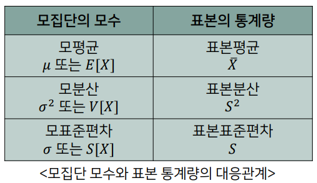


In [4]:
# [1] 평균, 분산, 표준편차 구하기
# Delta Degrees of Freedom (ddof=1) : pandas -> 표본에 대한 작업
# 자유도 = N - ddof

s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print('표본평균:', s.mean())
print('표본분산:', s.var())
print('표본표준편차:', s.std())
print('모분산:', s.var(ddof=0))
print('모표준편차:', s.std(ddof=0))

표본평균: 5.5
표본분산: 9.166666666666666
표본표준편차: 3.0276503540974917
모분산: 8.25
모표준편차: 2.8722813232690143


In [5]:
# [2] numpy의 var()와 pandas의 var()가 다른 이유는?
# ddof=0, numpy -> 모집단에 대한 작업
s = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print('평균:', s.mean())
print('표본분산:', s.var(ddof=1))
print('표본표준편차:', s.std(ddof=1))
print('모분산:', s.var())
print('모표준편차:', s.std())

평균: 5.5
표본분산: 9.166666666666666
표본표준편차: 3.0276503540974917
모분산: 8.25
모표준편차: 2.8722813232690143


In [6]:
https://pandas.pydata.org/docs/reference/api/pandas.Series.var.html
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.var.html 

SyntaxError: ignored

### 2.표본추출(Sampling)
- DataFrame.sample(n=None, frac=None ,...)
- https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.sample.html

In [7]:
# [1] tips 데이터를 가져오기 한다
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [8]:
# [2] tips의 전체 데이터 개수 확인
tips.shape

(244, 7)

In [9]:
# [2] 단순 무작위 추출 - 비율 사용
# 0.02(2%) 추출 : 244 * 0.02 = 4.88 -> 5개
tips.sample(frac=0.02)

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2
47,32.40,6.00,Male,No,Sun,Dinner,4
188,18.15,3.50,Female,Yes,Sun,Dinner,3
146,18.64,1.36,Female,No,Thur,Lunch,3


In [10]:
# random_state=1 사용 시 동일한 결과
tips.sample(frac=0.02, random_state=1)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3
122,14.26,2.50,Male,No,Thur,Lunch,2
89,21.16,3.00,Male,No,Thur,Lunch,2


In [11]:
# [3] 단순 무작위 추출 - 정수 사용
# 5개 sample 추출
tips.sample(n=5, random_state=1)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3
122,14.26,2.50,Male,No,Thur,Lunch,2
89,21.16,3.00,Male,No,Thur,Lunch,2


In [12]:
# [4] 계통 추출 - 1부터 시작해 50 마다 1개 추출
# tips의 iloc을 사용해 특정 번호 list => [1, 51, 101, 151, 201] 로 indexing
# range(시작, 끝, 간격)
tips.iloc[range(1, len(tips), 50) ,:]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
51,10.29,2.60,Female,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
151,13.13,2.00,Male,No,Sun,Dinner,2
201,12.74,2.01,Female,Yes,Thur,Lunch,2


In [13]:
# [5] 층화 추출 - 성별을 기준으로 성별 비율에 맞춰 10개 데이터 추출
# [5-1] 성별 비율 구하기(rate), 추출할 sample 개수 구하기(sample_n)
sample_n = 10
temp = tips['sex'].value_counts(normalize=True).to_frame()
temp.columns = ['rate']
temp['sample_n'] = round(sample_n * temp['rate'], 0).astype('int')
temp

,rate,sample_n
Male,0.643443,6
Female,0.356557,4


In [14]:
temp.loc['Male', 'sample_n'], temp.loc['Female', 'sample_n']

(6, 4)

In [15]:
# [5-2] Female, Male로 데이터 분리 및 sample개수 만큼의 임의 표본 추출
Female = tips.loc[tips['sex'] == 'Female', :]
Male = tips.loc[tips['sex'] == 'Male', :]
df1 = Female.sample(n=temp.loc['Female', 'sample_n'], random_state=1)
df2 = Male.sample(n=temp.loc['Male', 'sample_n'], random_state=1)
df = pd.concat([df1, df2]) # df = df1.append(df2)
df.sample(frac=1) # 남녀 다시 섞기, 시계열 아니면 정렬된 게 좋진 않음

,total_bill,tip,sex,smoker,day,time,size
54,25.56,4.34,Male,No,Sun,Dinner,4
125,29.80,4.20,Female,No,Thur,Lunch,6
132,11.17,1.50,Female,No,Thur,Lunch,2
43,9.68,1.32,Male,No,Sun,Dinner,2
47,32.40,6.00,Male,No,Sun,Dinner,4
106,20.49,4.06,Male,Yes,Sat,Dinner,2
182,45.35,3.50,Male,Yes,Sun,Dinner,3
121,13.42,1.68,Female,No,Thur,Lunch,2
68,20.23,2.01,Male,No,Sat,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


### 3.이상치(Outlier)
- 일반적인 값들과 많이 떨어진 위치의 데이터
- 평균은 이상치에 영향을 크게 받지만, 중앙값은 영향을 거의 받지 않음
- 이상치도 정보가 될 수 있음

In [16]:
# [1] 이상치와 평균, 중앙값의 관계
import pandas as pd
data1 = [10,20,30,40,50]
data2 = [10,20,30,40,200]
a = pd.Series(data1)
b = pd.Series(data2)
print('평균  ', a.mean(), b.mean())
print('중앙값', a.median(), b.median())

평균   30.0 60.0
중앙값 30.0 30.0


#### 3-01. 이상치 확인

In [17]:
# [2] seaborn의 tips 데이터셋 가져오기
tips = sns.load_dataset("tips")

In [18]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


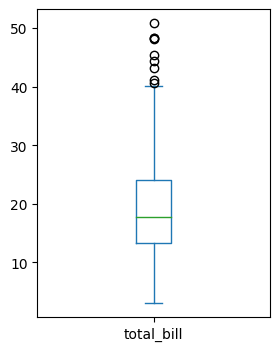

In [19]:
# [3] tips의 'total_bill'의 이상치를 그래프로 확인하기
tips['total_bill'].plot.box(figsize=(3,4))
plt.show()

In [20]:
# Series/DataFrame => x
#1 x.plot(kind='box')
#2 x.plot.box()

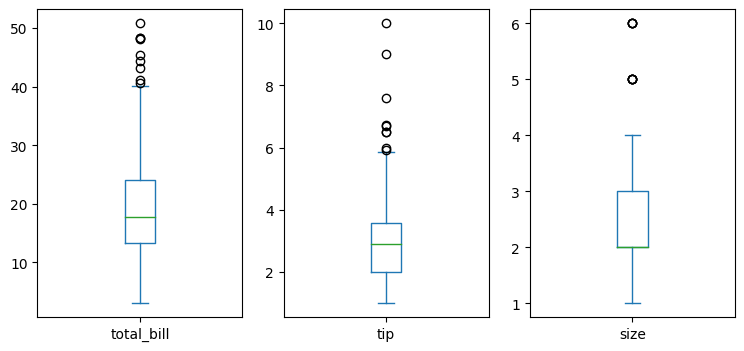

In [21]:
# [4] DataFrame의 plot을 사용하여 연속형 데이터에 대해 모두 boxplot 그리기
tips.plot(kind='box', subplots=True, figsize=(9,4))
plt.show()

In [22]:
# [5] ESD(Extream Studentized Diviate)를 이용한 방법
# 평균으로 부터 3 표준편차 떨어진 값을 이상치로 판단
# tip에 대한 이상치 구하기, 소수점 아래 2째자리까지 표기
s = tips['tip']
s_mean, s_std = s.mean(), s.std()
e_lower = round(s_mean - 3 * s_std, 2)
e_upper = round(s_mean + 3 * s_std, 2)
print(f'Lower: {e_lower}, Upper: {e_upper}')

Lower: -1.15, Upper: 7.15


In [23]:
# [6] 사분위수를 이용한 방법
# Q1 - 1.5*IQR 미만, Q3 + 1.5*IQR 초과 를 이상치로 판단 (IQR = Q3 - Q1)
# tip에 대한 이상치 구하기, 소수점 아래 2째자리까지 표기
s = tips['tip']
Q1, Q3 = s.quantile([0.25, 0.75])
IQR = Q3 - Q1
q_lower = Q1 - 1.5 * IQR
q_upper = Q3 + 1.5 * IQR
print(f'Lower: {q_lower}, Upper: {q_upper}')

Lower: -0.34375, Upper: 5.90625


#### 3-02. 이상치 처리

In [24]:
# [7] 이상치 제거 - 정상범주에 있는 데이터를 indexing 하는 방법으로 처리 (q_lower, q_upper 사이값이 정상)
tips2 = tips[(tips['tip'] >= q_lower) & (tips['tip'] <= q_upper)]
print(tips.shape, tips2.shape)

(244, 7) (235, 7)


In [25]:
# [8] 이상치 데이터 모음
tips_outlier = tips[(tips['tip'] < q_lower) | (tips['tip'] > q_upper)]
tips_outlier

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [26]:
# [9] 이상값 대체
# q_upper 보다 큰 데이터는 q_upper, q_lower 보다 작은 데이터는 q_lower로 변경
# tips3 데이터프레임에서 'tip' 값이 q_upper 보다 큰 것의 'tip'값을 q_upper 값으로 변경
# tips3 데이터프레임에서 'tip' 값이 q_lower 보다 작은 것의 'tip'값을 q_lower 값으로 변경
tips3 = tips.copy()
# code here
tips3.loc[tips['tip'] > q_upper, 'tip'] = q_upper
tips3.loc[tips['tip'] < q_lower, 'tip'] = q_lower

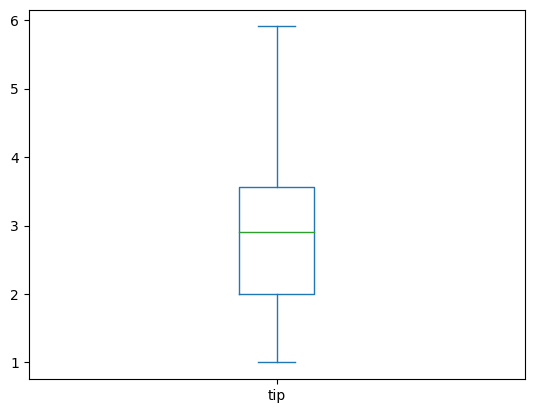

In [27]:
tips3['tip'].plot.box()
plt.show()

### 4.데이터 변환(Transform)
- 이상치를 완화하거나, 정규분포가 되도록 하기 위해 사용함 (학습이 잘되도록)
- numpy의 log1p, sqrt, expm1, power 등의 함수 사용
    - log1p, sqrt 는 큰 값을 작게 만들어 주며, 오른쪽 꼬리가 긴 분포를 정규분포로 변환하는데 사용, 큰 이상치를 작게 만들 수 있음
    - expm1, power는 작은 값을 크게 만들어 주며, 왼쪽 꼬리가 긴 분포를 정규분포로 변환하는데 사용함

In [28]:
# [0] 데이터 가져오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

In [29]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


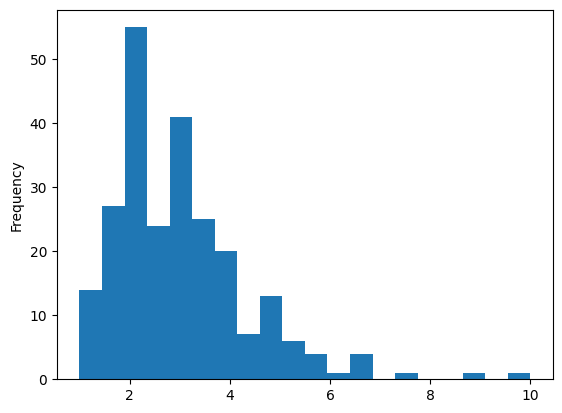

In [30]:
# [1] tips에서 tip의 분포 확인
# 오른쪽으로 꼬리가 길다 -> 큰 값을 작게 만들기
s = tips['tip']
s.plot.hist(bins=20)
plt.show()

In [31]:
# [2] y = log(x) 이해 -> np.power(np.e, y) = x  (몇 번 곱)
# power는 e의 y승, np.e는 약 2.718
# np.log10(100) => np.power(10, 2) = 100
print(np.log10(100), np.power(10, 2))
print(np.log(100), np.power(np.e, 4.605170185988092))

2.0 100
4.605170185988092 100.00000000000001


In [32]:
# [3] y = exp(x) 이해 -> y = power(np.e, x)
# e의 x승
print(np.exp(4.605170185988092), np.power(np.e, 4.605170185988092))

100.00000000000004 100.00000000000001


In [33]:
# [4] log(0) -> x가 0인 경우 -inf 이기 때문에 x에 +1을 해서 동작하는 np.log1p를 사용함
# 결과 -inf # inf는 무한
# 데이터가 0을 포함하고 있을 경우 사용
np.log(0)

<ipython-input-33-69fdcff8b5ad>:4: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

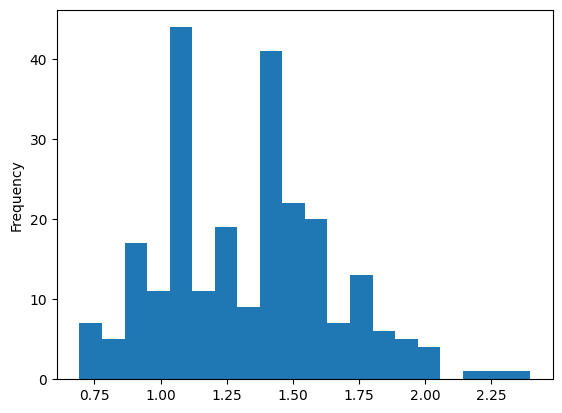

In [34]:
# [5] tip의 분포를 오른쪽 꼬리가 긴 것에 대해서 짧게 만들기 (로그)
s = np.log1p(tips['tip'])
s.plot.hist(bins=20)
plt.show()

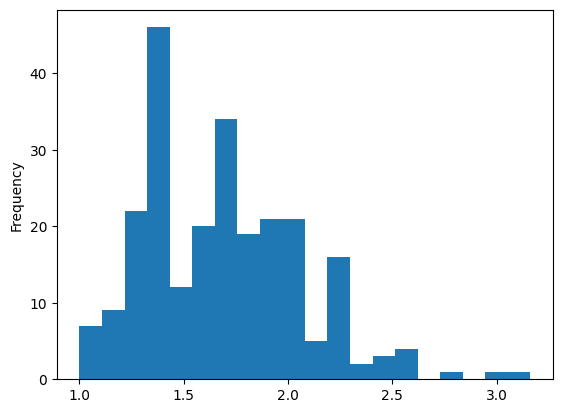

In [35]:
# [6] tip의 분포를 오른쪽 꼬리가 긴 것에 대해서 짧게 만들기  (제곱근)
s = np.sqrt(tips['tip'])
s.plot.hist(bins=20)
plt.show()

In [36]:
# [7] tips['tip'] 원본 -> log1p -> expm1 = 원본
# 변환했던 데이터 원본으로 돌리기
a = tips['tip']
b = np.log1p(a)
c = np.expm1(b)
print(a[:3], b[:3], c[:3], sep='\n\n')

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64

0    0.698135
1    0.978326
2    1.504077
Name: tip, dtype: float64

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64


In [37]:
# [8] tips['tip'] 원본 - sqrt - power = 원본
# 변환했던 데이터 원본으로 돌리기
a = tips['tip']
b = np.sqrt(a)
c = np.power(b, 2)
print(a[:3], b[:3], c[:3], sep='\n\n')

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64

0    1.004988
1    1.288410
2    1.870829
Name: tip, dtype: float64

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64


### 5.데이터 스케일링(Scaling)
- min-max normalization : 값의 범위를 [0, 1]로 변환
   - (xi - x.min()) / (x.max() - x.min())
   - 가장 작은 값이 0, 가장 큰 값이 1이 되고 그 사이에 분포
- standardization : 특성의 값이 정규분포를 갖도록 변환 (평균 0, 표준편차 1) 
    - (xi - x.mean()) / x.std()

In [38]:
# [1] Scaling을 위한 함수 구현
def minmaxScale(x):
    return (x - x.min()) / (x.max() - x.min())

def standardScale(x):
    return (x - x.mean()) / x.std()

In [39]:
# [2] minmaxScale 함수를 사용한 'tip' 컬럼의 스케일링
x = minmaxScale(tips['tip'])
print(x.min(), x.max())

0.0 1.0


In [40]:
# [3] standardScale 함수를 사용한 'tip' 컬럼의 스케일링
x = standardScale(tips['tip'])
print(x.mean(), x.std())

2.8392588826479415e-16 0.9999999999999999


In [42]:
# [4] sklearn 라이브러리의 스케일러(MinMaxScaler)를 사용한 스케일링
# 스케일러의 fit_transform() 사용시 2차원의 데이터를 전달해야 함 
# (DataFrame도 2차원), 결과는 ndarray로 반환 됨
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x = MinMaxScaler().fit_transform(tips[['tip']]) # tips['tip']은 1차원이어서 오류
print(x.min(), x.max())

0.0 1.0


In [44]:
# [5] sklearn 라이브러리의 스케일러(StandardScaler)를 사용한 스케일링
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(tips[['tip']])
print(x.mean(), x.std())

2.8392588826479415e-16 0.9999999999999998


In [45]:
# [6] scipy.stats의 zscore 함수를 사용한 스케일링
from scipy.stats import zscore
x = zscore(tips['tip'])
print(x.mean(), x.std())

2.8392588826479415e-16 1.0020555006273097


### 6.Encoding (범주형 -> 수치형)
이것저것 해보고 성능 좋은 것 선택하면 됨

- Label Encoding : 값의 일련번호로 표기함
   - '여성', '남성', '아이' : 0, 1, 2
   - '월', '화', ... '일' : 0, 1, ...6 
   - category 타입의 cat.codes
   - Series.replace()를 사용 함
- One Hot Encoding : 범주의 개수 만큼의 feature를 만들어냄
   
               LE  여자  남자  아이
        '여자'  0    1    0     0
        '남자'  1    0    1     0
        '여자'  0    1    0     0
        '남자'  1    0    1     0
        '아이'  2    0    0     1
        '남자'  1    0    1     0
        '아이'  2    0    0     1

   - pd.get_dummies(Series/DataFrame)        

In [46]:
import pandas as pd
df = pd.DataFrame({'A':['월', '화', '수', '화', '수', '금', '월'],
                   'B':['여자', '남자', '여자', '남자', '아이', '남자', '아이']})
df

,A,B
0,월,여자
1,화,남자
2,수,여자
3,화,남자
4,수,아이
5,금,남자
6,월,아이


In [47]:
# [1] 요일에 대해서 Label Encoding 합니다.  (cat.code 사용)
weekdays = '월 화 수 목 금 토 일'.split()
df['A_LE'] = pd.Categorical(df['A'], weekdays, ordered=True)
df['A_LE'] = df['A_LE'].cat.codes
df

,A,B,A_LE
0,월,여자,0
1,화,남자,1
2,수,여자,2
3,화,남자,1
4,수,아이,2
5,금,남자,4
6,월,아이,0


In [51]:
# [2] '남자', '여자', '아이'에 대해서 Label Encoding 합니다 (replace 사용)
# v = df['B'].unique() 하면 종류 알 수 있음
# df['B_LE'] = df['B'].replace(v, range(len(v))) 
df['B_LE'] = df['B'].replace(['남자', '여자', '아이'], [0, 1, 2])
df

,A,B,A_LE,B_LE
0,월,여자,0,1
1,화,남자,1,0
2,수,여자,2,1
3,화,남자,1,0
4,수,아이,2,2
5,금,남자,4,0
6,월,아이,0,2


In [52]:
# [3] df의 'A' 컬럼을 One Hot Encoding 합니다.
a = pd.get_dummies(df['A'])
a

,금,수,월,화
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
5,1,0,0,0
6,0,0,1,0


In [53]:
# [4] df의 'B' 컬럼을 One Hot Encoding 합니다.
b = pd.get_dummies(df['B'])
b

,남자,아이,여자
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,1,0
5,1,0,0
6,0,1,0


In [59]:
# [5] df, a, b를 axis=1 방향으로 합치기 합니다.
# 실제로는 원핫인코딩/레이블인코딩 결과 둘 중 하나만 사용, 원래 분류 삭제
df2 = pd.concat([df, a, b], axis=1)

In [58]:
# [6] df의 모든 범주형 변수를 OneHotEncoding 합니다
df3 = pd.get_dummies(df)
df3

,A_LE,B_LE,A_금,A_수,A_월,A_화,B_남자,B_아이,B_여자
0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,0,1,1,0,0
2,2,1,0,1,0,0,0,0,1
3,1,0,0,0,0,1,1,0,0
4,2,2,0,1,0,0,0,1,0
5,4,0,1,0,0,0,1,0,0
6,0,2,0,0,1,0,0,1,0


### 7.Binning (수치형 -> 범주형)
- 연속형 변수를 구간을 이용하여 범주화 하는 과정
- 정보가 압축되고 단순해짐 정확도는 떨어짐
- 이상치 해결 방법 중 한 가지로 사용하거나, 오버피팅(overfitting) 방지 기법으로 사용
- (3, 6]  :  3초과 6포함, right=True
- [3, 6)  :  3이상 6포함하지 않음, right=False
- pd.cut()

In [61]:
import pandas as pd

In [62]:
# [0] 데이터 준비
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df = pd.DataFrame(data, columns=['data'])
df['data'].to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [64]:
# [1] data를 사용하여 0~3, 4~6, 7~10 에 대한 binning을 하여 보도록 한다
# 범주의 레이블은 ['A', 'B', 'C']를 사용한다

# (Min-1, 3], (3, 6], (6, Max] 로 범주를 만들어 result_A 컬럼으로 추가합니다.
Min, Max = df['data'].min(), df['data'].max()
df['result_A'] = pd.cut(df['data'], [Min-1, 3, 6, Max], labels=['A', 'B', 'C'], right=True)
df

# [Min, 3), [3, 6), [6, Max+1) 로 범주를 만들어 result_B 컬럼으로 추가합니다.
df['result_B'] = pd.cut(df['data'], [Min, 3, 6, Max+1], labels=['A', 'B', 'C'], right=False)
df

,data,result_A,result_B
0,0,A,A
1,1,A,A
2,2,A,A
3,3,A,B
4,4,B,B
5,5,B,B
6,6,B,C
7,7,C,C
8,8,C,C
9,9,C,C


In [65]:
# [2] result_A에 대해 LabelEncoding을 하여 result_C를 컬럼으로 추가합니다.
df['result_C'] = df['result_A'].cat.codes # 카테고리 타입 수치형으로 바꿔줌
df

,data,result_A,result_B,result_C
0,0,A,A,0
1,1,A,A,0
2,2,A,A,0
3,3,A,B,0
4,4,B,B,1
5,5,B,B,1
6,6,B,C,1
7,7,C,C,2
8,8,C,C,2
9,9,C,C,2


비율을 사용하여 구간 나누기
- pd.qcut(데이터, 구간)
  - q는 quantile
- 구간은 0 ~ 1 사이의 숫자 사용

In [68]:
# [3] 비율을 사용하여 구간나누기
df = pd.DataFrame([0, 1, 2, 3, 10, 11, 12, 13, 20, 30, 40, 50], columns=['data'])
pd.qcut(df['data'], [0, 0.25, 0.5, 0.75, 1], labels=range(4))

0     0
1     0
2     0
3     1
4     1
5     1
6     2
7     2
8     2
9     3
10    3
11    3
Name: data, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [71]:
# [4] 다음 데이터를 binning 하여보세요 (bins 컬럼 추가)
# 사용구간 : [10, 40), [40, 50), [50, 60), [60, 70), [70, 80), [80, 101)
# 사용레이블 : '10-40미만', '40-50미만', '50-60미만', '60-70미만', '70-80미만', '80-100' 
data = [55.6, 83.3, 43.4, 58.1, 31.6, 55.6, 60.7, 64.6,
        73.3, 55.6, 64.3, 52.8, 22.7, 46.3, 71.4, 53.8,
        64.5, 67.9, 71.4, 80.0, 59.5, 40.5, 77.1, 58.6,
        65.4, 52.4, 66.7, 91.3, 41.3, 72.1, 61.9, 78.4,
        63.6, 41.0, 65.2, 81.3, 54.8, 19.6, 50.0, 53.1,
        41.2, 56.5]
df = pd.DataFrame(data, columns=['data'])        
df['bins'] = pd.cut(df['data'], [10,40,50,60,70,80,101], 
       labels=['10-40미만', '40-50미만', '50-60미만', '60-70미만', '70-80미만', '80-100'], right=False)
df.head()

,data,bins
0,55.6,50-60미만
1,83.3,80-100
2,43.4,40-50미만
3,58.1,50-60미만
4,31.6,10-40미만


In [72]:
# [5] bins 컬럼에 대해 LabelEncoding을 하여 bin_n 컬럼을 추가합니다.
df['bin_n'] = df['bins'].cat.codes
df.head()

,data,bins,bin_n
0,55.6,50-60미만,2
1,83.3,80-100,5
2,43.4,40-50미만,1
3,58.1,50-60미만,2
4,31.6,10-40미만,0


In [79]:
# [6] 다음 나이 데이터를 binning 하여보세요
bin_labels = 'Baby Child Teenager Student Young_Adult Adult Elderly'.split()   # 7개 label
data = [42, 11, 40, 16, 35, 58, 1, 13, 22, 7, 62, 11, 52, 67, 42, 33, 15, 60, 36, 36]
df = pd.DataFrame(data, columns=['age'])

# (-1, 5], (5, 12], (12, 18], (18, 25], (25, 35], (35, 60], (60, df['age'].max()] 로
# 범주를 만들어 age_cat 컬럼으로 추가합니다.
df['age_cat'] = pd.cut(df['age'], [-1, 5, 12, 18, 25, 35, 60, df['age'].max()],
                       labels = bin_labels, right=True)
df['age_LE'] = df['age_cat'].cat.codes # 머신러닝에서 사용 가능한 수치형 데이터
df.head()

,age,age_cat,age_LE
0,42,Adult,5
1,11,Child,1
2,40,Adult,5
3,16,Teenager,2
4,35,Young_Adult,4


### 8.상위 10%, 하위 10% 데이터 추출

In [81]:
# [1] quantile 사용하여 상위 10%(큰 값), 하위 10%(작은 값)의 위치값 알아내기
# p01(하위 10%), p09(상위 10%)로 저장하기
# 데이터 정렬되어 있지 않아도 알아서 함
import pandas as pd
X = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # 가장 앞은 0%의 위치 가장 뒤는 100%의 위치
df = pd.DataFrame(X, columns=['data'])
# df['data'].quantile([0, 0.25, 0.5, 0.75, 1])

p01, p09 = df['data'].quantile([0.1, 0.9])
print(p01, p09)

10.0 90.0


In [83]:
# [2] p01 사용하여 하위 10%의 데이터 추출
print(df[df['data'] <= p01])

   data
0     0
1    10


In [86]:
# [3] p09 사용하여 상위 10%의 데이터 추출
print(df[df['data'] >= p09])

    data
9     90
10   100


In [89]:
df = pd.DataFrame(range(0, 101), columns=['data']) # 0 ~ 100
df.quantile(0.213) # 21.3

100

### 9.도수분포표

In [ ]:
# [0] 문자열 리스트의 곱셈 이해
['A+'] * 3 + ['A'] * 6  # ['A+', 'A+', 'A+', 'A', 'A', 'A', 'A', 'A', 'A']

['A+', 'A+', 'A+', 'A', 'A', 'A', 'A', 'A', 'A']

In [91]:
# [1] 데이터 생성하기
data = ['A+', 'A', 'B+', 'B', 'C+', 'C', 'D+', 'D', 'F']
cnt  = [3, 6, 12, 16, 10, 8, 4, 1, 2]
mylist = []
for s, c in zip(data, cnt): # 동일한 인덱스에 있는 값을 튜플로 가져옴
    mylist.extend([s] * c) # A+ 3개, A 6개 ... 이런 식으로 들어감

df = pd.DataFrame(mylist, columns=['data'])
df = df.sample(frac=1)
print(df['data'].to_list())

['C', 'B', 'A', 'A', 'B', 'B', 'C+', 'B+', 'B', 'B', 'D+', 'C+', 'B+', 'B', 'B+', 'B+', 'B+', 'B+', 'A+', 'D+', 'F', 'B+', 'F', 'B', 'C+', 'C', 'B', 'B+', 'B+', 'B', 'C', 'C+', 'B', 'B+', 'B', 'C+', 'A+', 'A', 'B', 'A', 'C+', 'C', 'C', 'C+', 'C', 'B', 'D+', 'A', 'B', 'D+', 'C+', 'D', 'A+', 'A', 'B', 'B', 'C', 'C+', 'B+', 'B+', 'C', 'C+']


In [95]:
# [2] mylist(=df)를 사용하여 도수분포표를 만들어 본다
s = pd.Categorical(df['data'], categories=data, ordered=True)
s = s.value_counts().sort_index()
print(s)

A+     3
A      6
B+    12
B     16
C+    10
C      8
D+     4
D      1
F      2
dtype: int64


In [101]:
# [3] s를 사용하여 도수분포표의 비율, 누적인원, 누적비율을 완성해 본다
df = pd.DataFrame(s, columns=['인원'])
df.index.name = '학점'
df['비율'] = (df['인원'] / df['인원'].sum()).round(2)
df['누적인원'] = df['인원'].cumsum()
df['누적비율'] = df['비율'].cumsum() # 누적합
display(df)

,인원,비율,누적인원,누적비율
학점,,,,
A+,3,0.05,3,0.05
A,6,0.10,9,0.15
B+,12,0.19,21,0.34
B,16,0.26,37,0.60
C+,10,0.16,47,0.76
C,8,0.13,55,0.89
D+,4,0.06,59,0.95
D,1,0.02,60,0.97
F,2,0.03,62,1.00


### 10.상관계수

In [102]:
# [0] 데이터 불러오기
# sns.load_dataset(데이터셋의 이름)
# iris(붓꽃) 데이터를 불러옴
# sepal : 꽃받침, petal : 꽃잎
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [104]:
# [1] species를 LabelEncoding하여 'species_LE' 컬럼 추가하기
from sklearn.preprocessing import LabelEncoder
print(iris['species'].value_counts())
ans = LabelEncoder().fit_transform(iris['species'])
print(ans)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [106]:
# LabelEncoder의 역할
encoder = LabelEncoder() 
print(dir(encoder))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'fit', 'fit_transform', 'get_params', 'inverse_transform', 'set_output', 'set_params', 'transform']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(iris['species']) # 범주 -> 숫자 매칭
ans1 = encoder.transform(['setosa', 'versicolor', 'setosa', 'virginica', 'versicolor']) # 반환값 존재
ans2 = encoder.inverse_transform([0, 1, 0, 2, 1])
print(ans1, ans2)

In [108]:
iris.groupby('species').agg(['mean', 'min', 'max'])

sepal_length           sepal_width           petal_length            \
                mean  min  max        mean  min  max         mean  min  max   
species                                                                       
0              5.006  4.3  5.8       3.428  2.3  4.4        1.462  1.0  1.9   
1              5.936  4.9  7.0       2.770  2.0  3.4        4.260  3.0  5.1   
2              6.588  4.9  7.9       2.974  2.2  3.8        5.552  4.5  6.9   

        petal_width            
               mean  min  max  
species                        
0             0.246  0.1  0.6  
1             1.326  1.0  1.8  
2             2.026  1.4  2.5

In [107]:
# [2] iris의 상관계수 구하기
# -1 또는 1에 가까울수록 높은 선형관계
iris['species'] = LabelEncoder().fit_transform(iris['species'])
print(iris.corr())

              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.117570      0.871754     0.817941  0.782561
sepal_width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658
petal_length      0.871754    -0.428440      1.000000     0.962865  0.949035
petal_width       0.817941    -0.366126      0.962865     1.000000  0.956547
species           0.782561    -0.426658      0.949035     0.956547  1.000000


### 11.이럴땐 어떻게

In [ ]:
# 억과 만 사이에 글자가 4글자가 아닐때 정수로 변경하기
number = ['123억456만', '13억45만', '5억5만', '456만']

def func(x):
    return f'{x.group(2)}{int(x.group(3)):04d}0000' if x.group(2) else f'{x.group(3)}0000'
    
s = pd.Series(number)
s = s.str.replace('((\d+)억)*(\d+)만', func, regex=True).astype('int')
s